In [1]:
!nvidia-smi

Mon Nov 14 05:29:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:1A:00.0 Off |                  N/A |
|  0%   36C    P0    82W / 350W |      5MiB / 24576MiB |     41%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import anogan
import os
import tensorflow as tf

In [3]:
#현재작업경로
os.getcwd()

'/tf/notebooks/anogan/anogan with handle data'

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import cv2
from skimage import color
from skimage import io
import random

os.environ['KMP_DUPLICATE_LIB_OK']='True'
%matplotlib inline

In [6]:
#생성자가 생성할 이미지의 세로
img_rows = 256
#생성자가 생성할 이미지의 가로
img_cols = 256
#생성자가 생성할 이미지 채널 (3 = 컬러이미지)
#시간관계상 1로 해서 흑백으로 진행
channels = 1

# 판별자가 판별할 이미지의 세로 가로 채널
img_shape = (img_rows, img_cols, channels)

# 생성자가 이미지를 생성할 초기 노이즈 개수
z_dim = 256

#이미지 파일 경로
# image_path = "/tf/notebooks/anogan/anogan with handle data/test/"

In [8]:
import cv2
import matplotlib.pyplot as plt
path = "/tf/notebooks/anogan/anogan with handle data/img/"
os.chdir(path) 
files = os.listdir(path) 

In [9]:
jpg_img = []
png_img = []
for file in files:
    if '.jpg' in file: 
        f = cv2.imread(file)
        jpg_img.append(f)
    if '.png' in file:
        p = cv2.imread(file)
        png_img.append(p)

In [10]:
data = np.stack([jpg_img], 0)

In [11]:
data = color.rgb2gray(data)

In [13]:

# data = data / 255.0

data = data.reshape(-1 ,256, 256, 1)

In [14]:
data.shape

(2, 256, 256, 1)

In [16]:
# X_train = load_images(image_path)

In [17]:
# X_train.shape

In [18]:
X_test = data

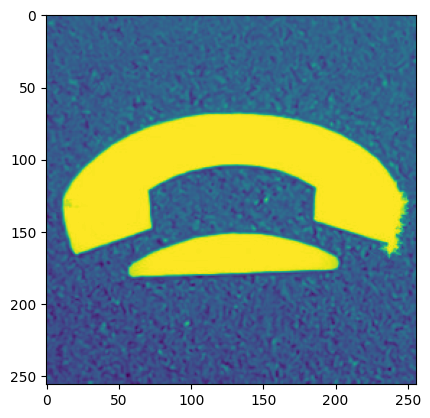

In [19]:
plt.imshow(X_test[0])

In [20]:

X_train = data

iterations = 200000
batch_size = 4
sample_interval = 2000

anogan.train(iterations, batch_size, sample_interval, X_train)


In [21]:
anogan.generate(100)

In [ ]:
import cv2
import matplotlib.pyplot as plt
path = "/tf/notebooks/anogan/anogan with handle data/test/"
os.chdir(path) 
files = os.listdir(path) 

In [ ]:
jpg_img = []
png_img = []
for file in files:
    if '.jpg' in file: 
        f = cv2.imread(file)
        jpg_img.append(f)
    if '.png' in file:
        p = cv2.imread(file)
        png_img.append(p)

In [ ]:
data1 = np.stack([jpg_img], 0)

In [ ]:
data1 = color.rgb2gray(data1)

In [ ]:

# data = data / 255.0

data1 = data1.reshape(-1 ,256, 256, 1)

In [ ]:
X_test1 = data1

1/1 [==============================] - 0s 103ms/step


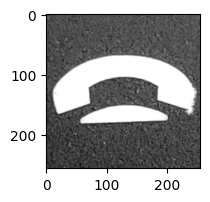

anomaly score : 8823.810546875


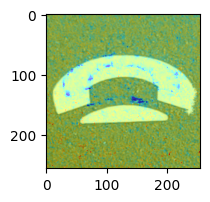

In [24]:
## compute anomaly score - sample from test set

X_test1 = X_test1.astype(np.float32)/255.
X_test1 = X_test1.reshape(-1, 256, 256, 1)
test_img = X_test1[0]

model = anogan.anomaly_detector()
ano_score, similar_img = anogan1.compute_anomaly_score(model, test_img.reshape(1, 256, 256, 1))
25
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(256,256), cmap=plt.cm.gray)
plt.show()
print("anomaly score : " + str(ano_score))
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(256,256), cmap=plt.cm.gray)
residual  = test_img.reshape(256,256) - similar_img.reshape(256, 256)
plt.imshow(residual, cmap='jet', alpha=.5)
plt.show()

1/1 [==============================] - 0s 103ms/step


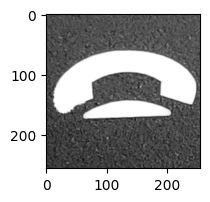

anomaly score : 8843.625


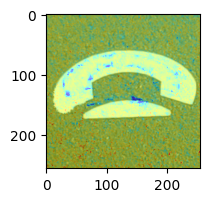

In [25]:
## compute anomaly score - sample from test set

X_test1 = X_test1.astype(np.float32)/255.
X_test1 = X_test1.reshape(-1, 256, 256, 1)
test_img = X_test1[1]

model = anogan.anomaly_detector()
ano_score, similar_img = anogan1.compute_anomaly_score(model, test_img.reshape(1, 256, 256, 1))
25
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(256,256), cmap=plt.cm.gray)
plt.show()
print("anomaly score : " + str(ano_score))
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(256,256), cmap=plt.cm.gray)
residual  = test_img.reshape(256,256) - similar_img.reshape(256, 256)
plt.imshow(residual, cmap='jet', alpha=.5)
plt.show()

In [ ]:
data2 = np.stack([png_img], 0)

In [ ]:

# data = data / 255.0

data2 = data2.reshape(-1 ,256, 256, 1)

In [22]:
X_test2 = data2

In [23]:
X_test2.shape

(3, 256, 256, 1)

1/1 [==============================] - 0s 105ms/step


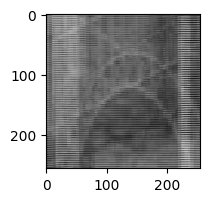

anomaly score : 31790.97265625


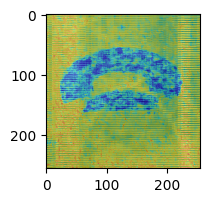

In [26]:
## compute anomaly score - sample from test set

X_test2 = X_test2.astype(np.float32)/255.
X_test2 = X_test2.reshape(-1, 256, 256, 1)
test_img = X_test2[0]

model = anogan.anomaly_detector()
ano_score, similar_img = anogan1.compute_anomaly_score(model, test_img.reshape(1, 256, 256, 1))
25
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(256,256), cmap=plt.cm.gray)
plt.show()
print("anomaly score : " + str(ano_score))
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(256,256), cmap=plt.cm.gray)
residual  = test_img.reshape(256,256) - similar_img.reshape(256, 256)
plt.imshow(residual, cmap='jet', alpha=.5)
plt.show()

In [27]:
import cv2
import matplotlib.pyplot as plt
path = "/tf/notebooks/anogan/anogan with handle data/test1/"
os.chdir(path) 
files = os.listdir(path) 

In [28]:
jpg = []
png = []
for file in files:
    if '.jpg' in file: 
        f = cv2.imread(file)
        jpg.append(f)
    if '.png' in file:
        p = cv2.imread(file)
        png.append(p)

In [ ]:
jpg_img = []
png_img = []
for file in files:
    if '.jpg' in file: 
        f = cv2.imread(file)
        jpg_img.append(f)
    if '.png' in file:
        p = cv2.imread(file)
        png_img.append(p)

In [29]:
data3 = np.stack([jpg], 0)

In [30]:
data3 = color.rgb2gray(data3)

In [31]:

# data = data / 255.0

data3 = data3.reshape(-1 ,256, 256, 1)

In [32]:
#이미지를 읽어서 X_train에 저장
X_test3 = data3

In [33]:
X_test3.shape

(1, 256, 256, 1)

1/1 [==============================] - 0s 119ms/step


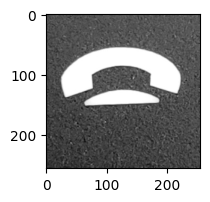

anomaly score : 8819.857421875


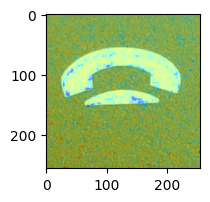

In [34]:
## compute anomaly score - sample from test set

X_test3 = X_test3.astype(np.float32)/255.
X_test3 = X_test3.reshape(-1, 256, 256, 1)
test_img = X_test3[0]

model = anogan1.anomaly_detector()
ano_score, similar_img = anogan1.compute_anomaly_score(model, test_img.reshape(1, 256, 256, 1))
25
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(256,256), cmap=plt.cm.gray)
plt.show()
print("anomaly score : " + str(ano_score))
plt.figure(figsize=(2, 2))
plt.imshow(test_img.reshape(256,256), cmap=plt.cm.gray)
residual  = test_img.reshape(256,256) - similar_img.reshape(256, 256)
plt.imshow(residual, cmap='jet', alpha=.5)
plt.show()